In [1]:
from PIL import Image
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import PIL.ImageOps
import math

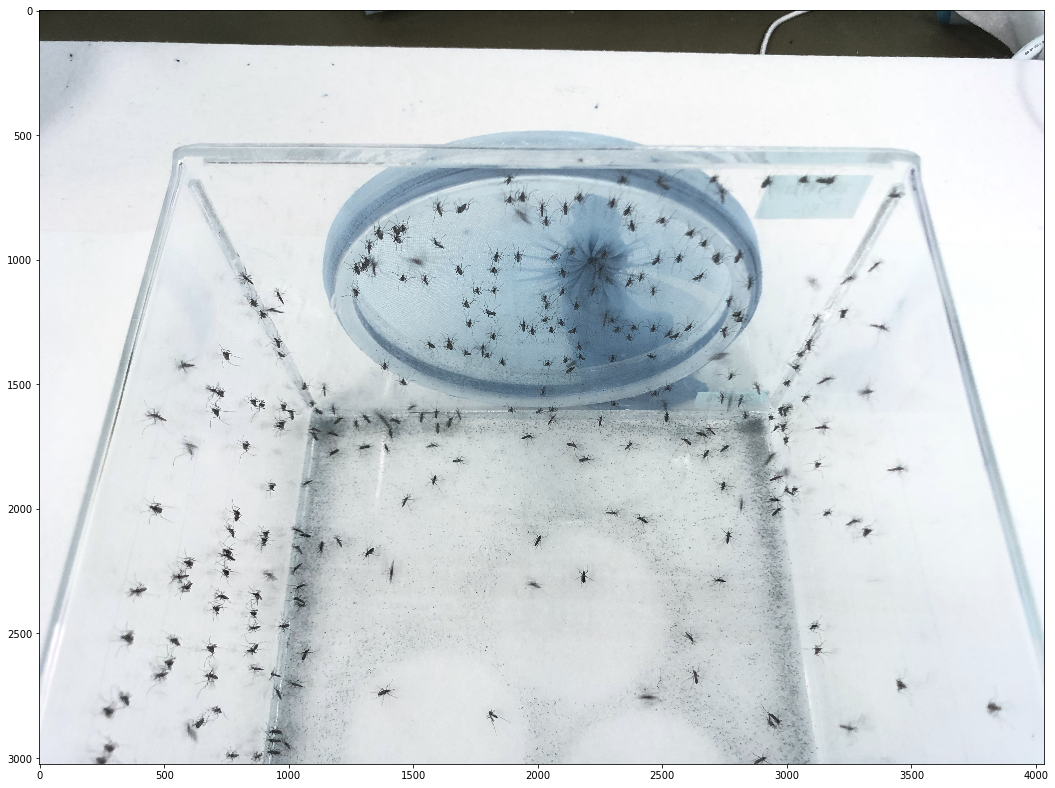

In [4]:
fileName = '20200814-092737-8a68c9f5.heic'
img = cv2.imread(fileName)
plt.figure(figsize = (18,36))
plt.imshow(img, 'gray')
plt.show()

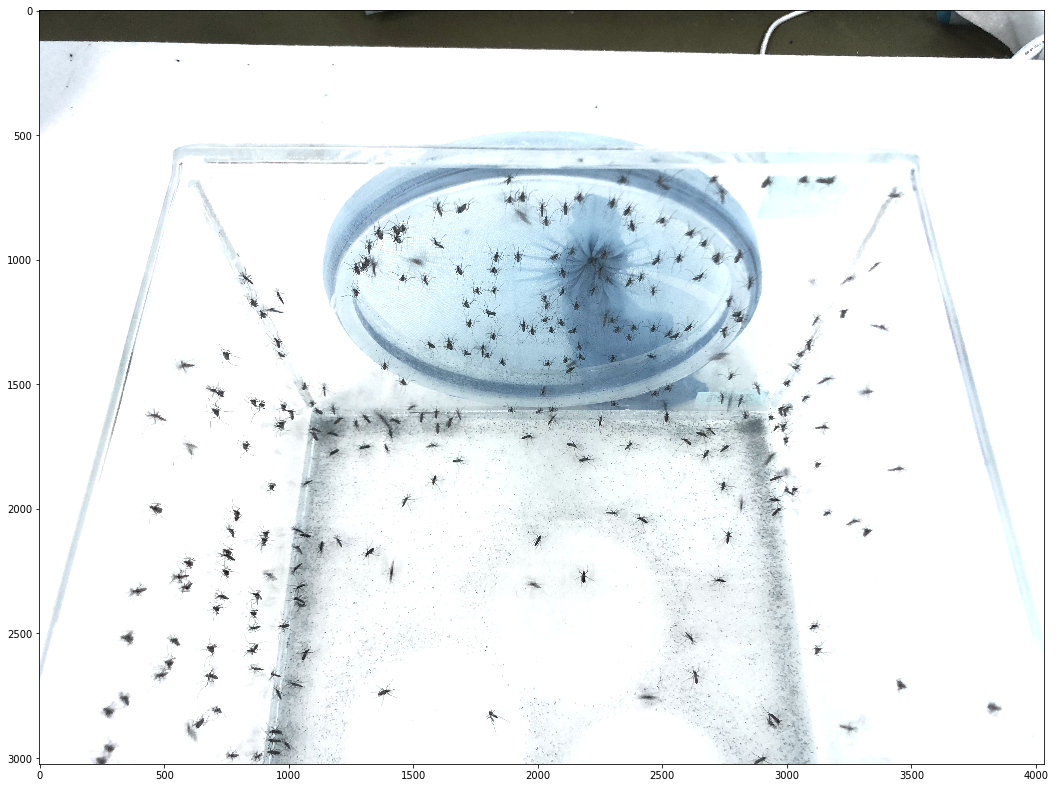

In [5]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

newimg = img.copy()
alpha = 60/np.std(img)
beta = 200-img.mean()
#newimg = np.uint8(np.clip((alpha * newimg + beta), 0, 255))
h, w, ch = newimg.shape
newimg2 = np.zeros([h, w, ch], newimg.dtype)
newimg = cv2.addWeighted(newimg, alpha, newimg2, 1-alpha, beta)

plt.figure(figsize = (18,36))
plt.imshow(newimg, 'gray')
plt.show()

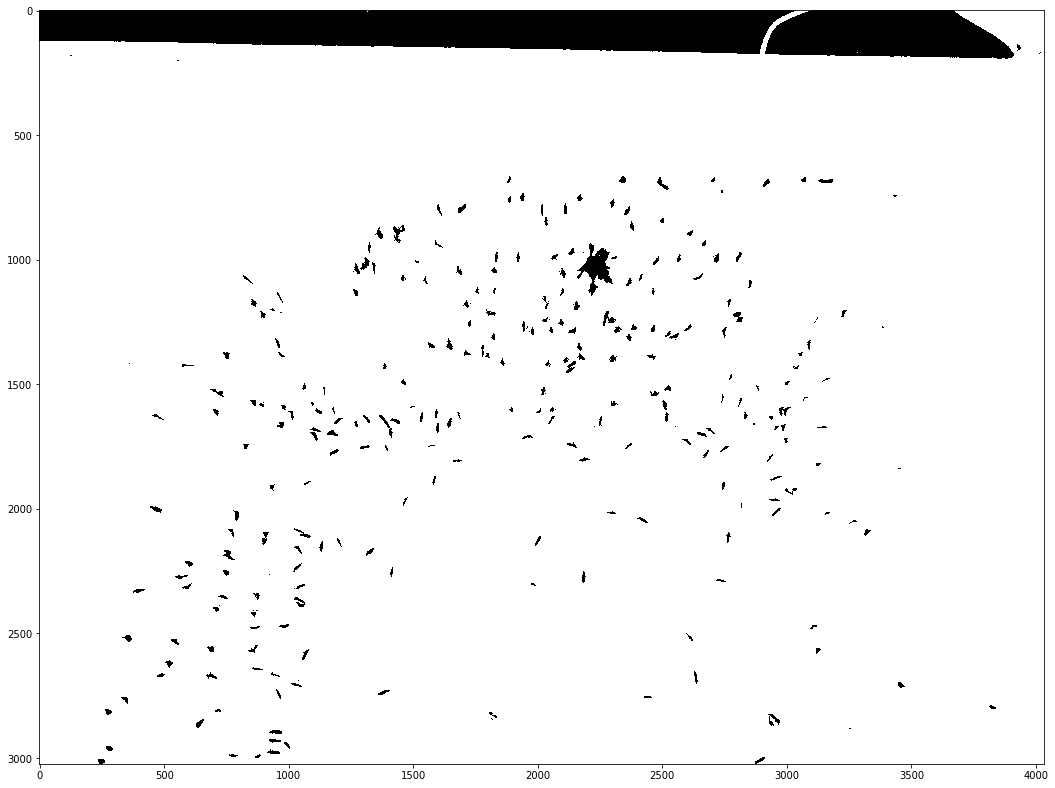

In [6]:
noise = cv2.fastNlMeansDenoisingColored(newimg,None,10,10,7,21)
gray = cv2.cvtColor(noise, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 3)
kernel_size = 3
im = cv2.GaussianBlur(median,(kernel_size, kernel_size), 0)
ret,final = cv2.threshold(im,110,255,cv2.THRESH_BINARY)

plt.figure(figsize = (18,36))
plt.imshow(final, 'gray')
plt.show()

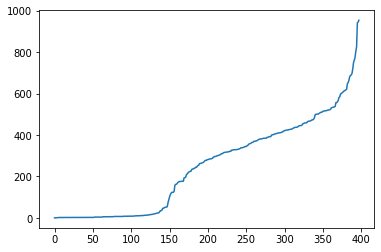

In [8]:
eq_cnts, _ = cv2.findContours(final,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
count = 0
area = []
for c in range(len(eq_cnts)):
    area.append(cv2.contourArea(eq_cnts[c]))
area.sort()
plt.plot(area[:-10])

mosquito number:  274


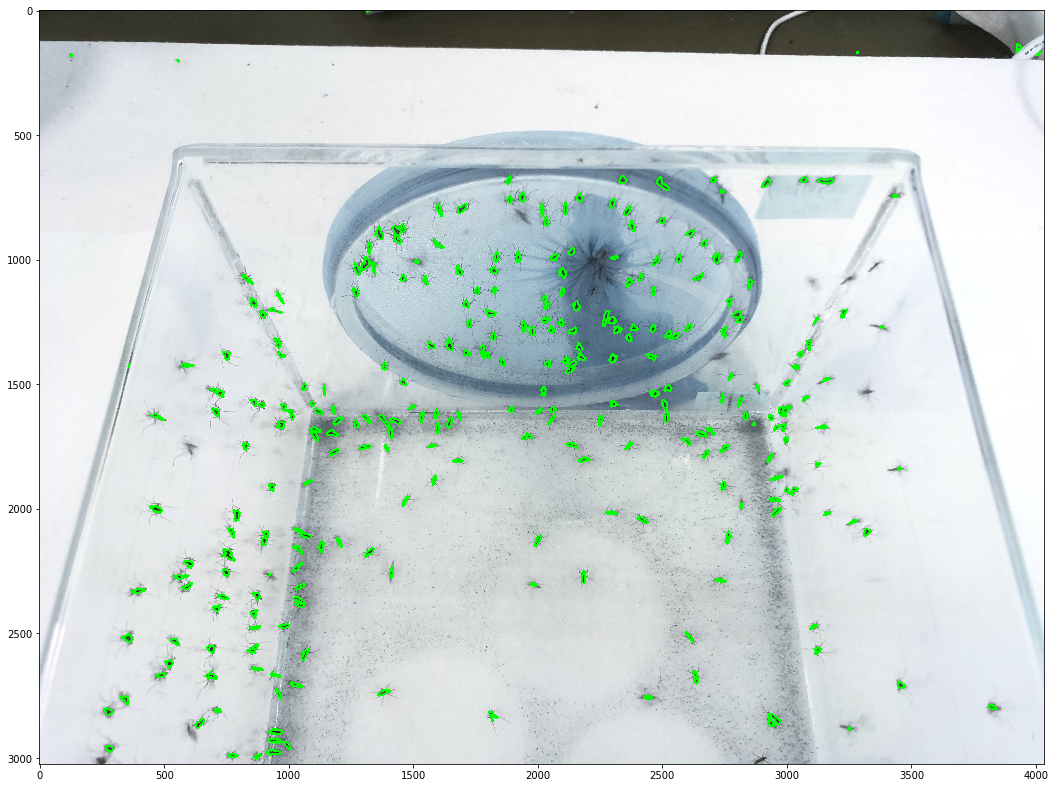

In [10]:
for c in range(len(eq_cnts)):
    if 2000> cv2.contourArea(eq_cnts[c]) > 20:
        cv2.drawContours(img, eq_cnts[c], -1, (0, 255, 0), 7)
        count += 1

plt.figure(figsize = (18,36))
plt.imshow(img, 'gray')
print("mosquito number: ", count)

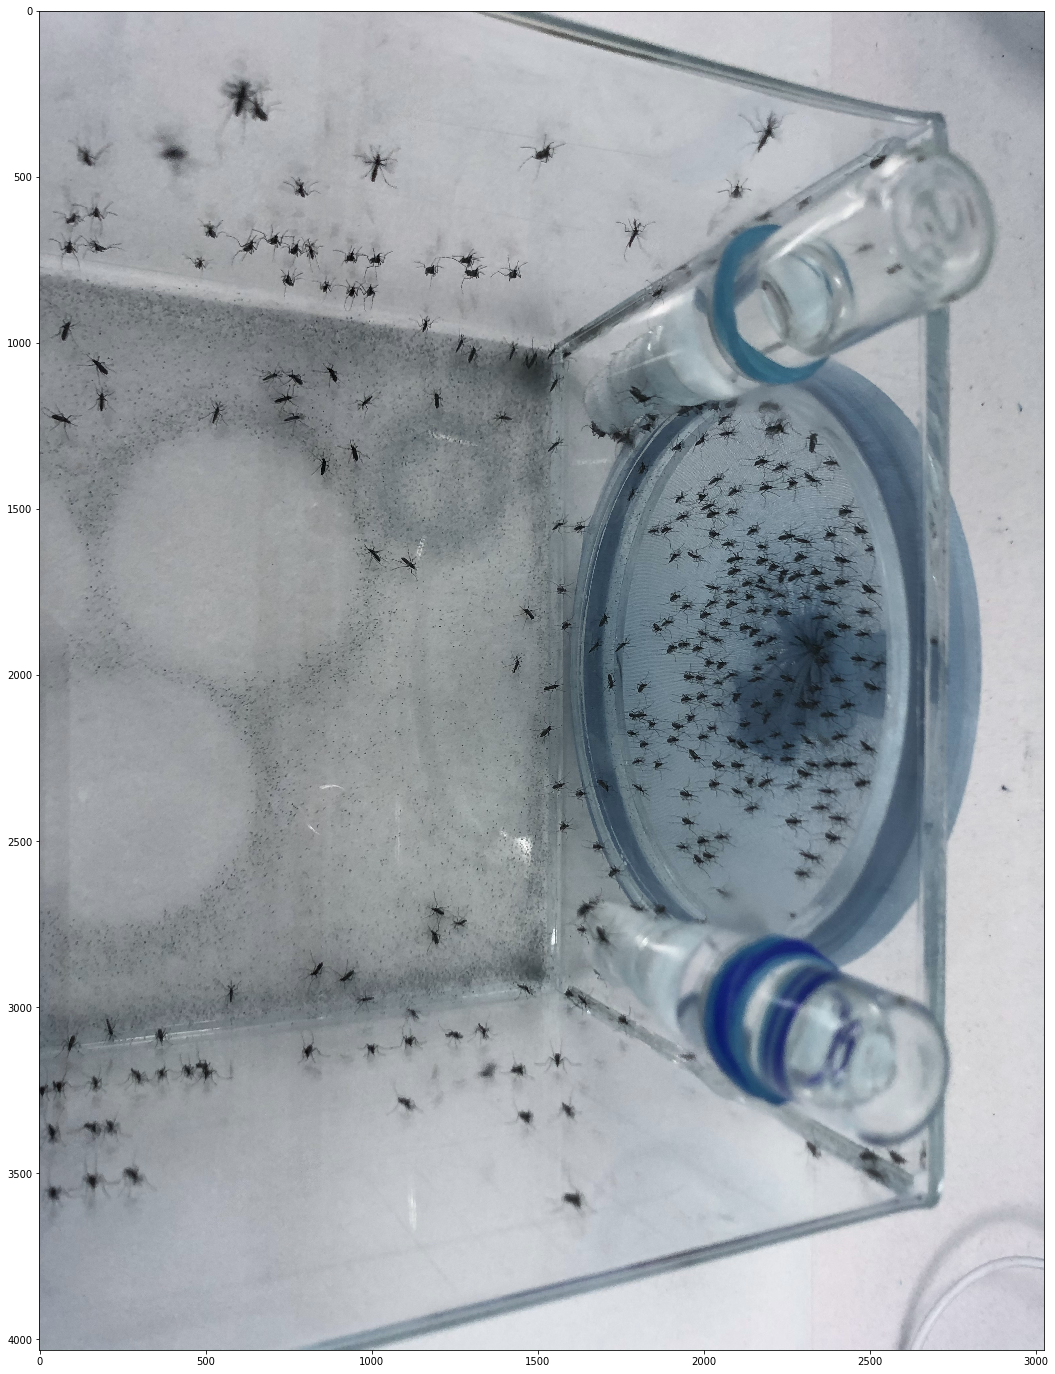

In [11]:
fileName = '20200814-092201-c66fba55.heic'
img = cv2.imread(fileName)

plt.figure(figsize = (18,36))
plt.imshow(img, 'gray')
plt.show()

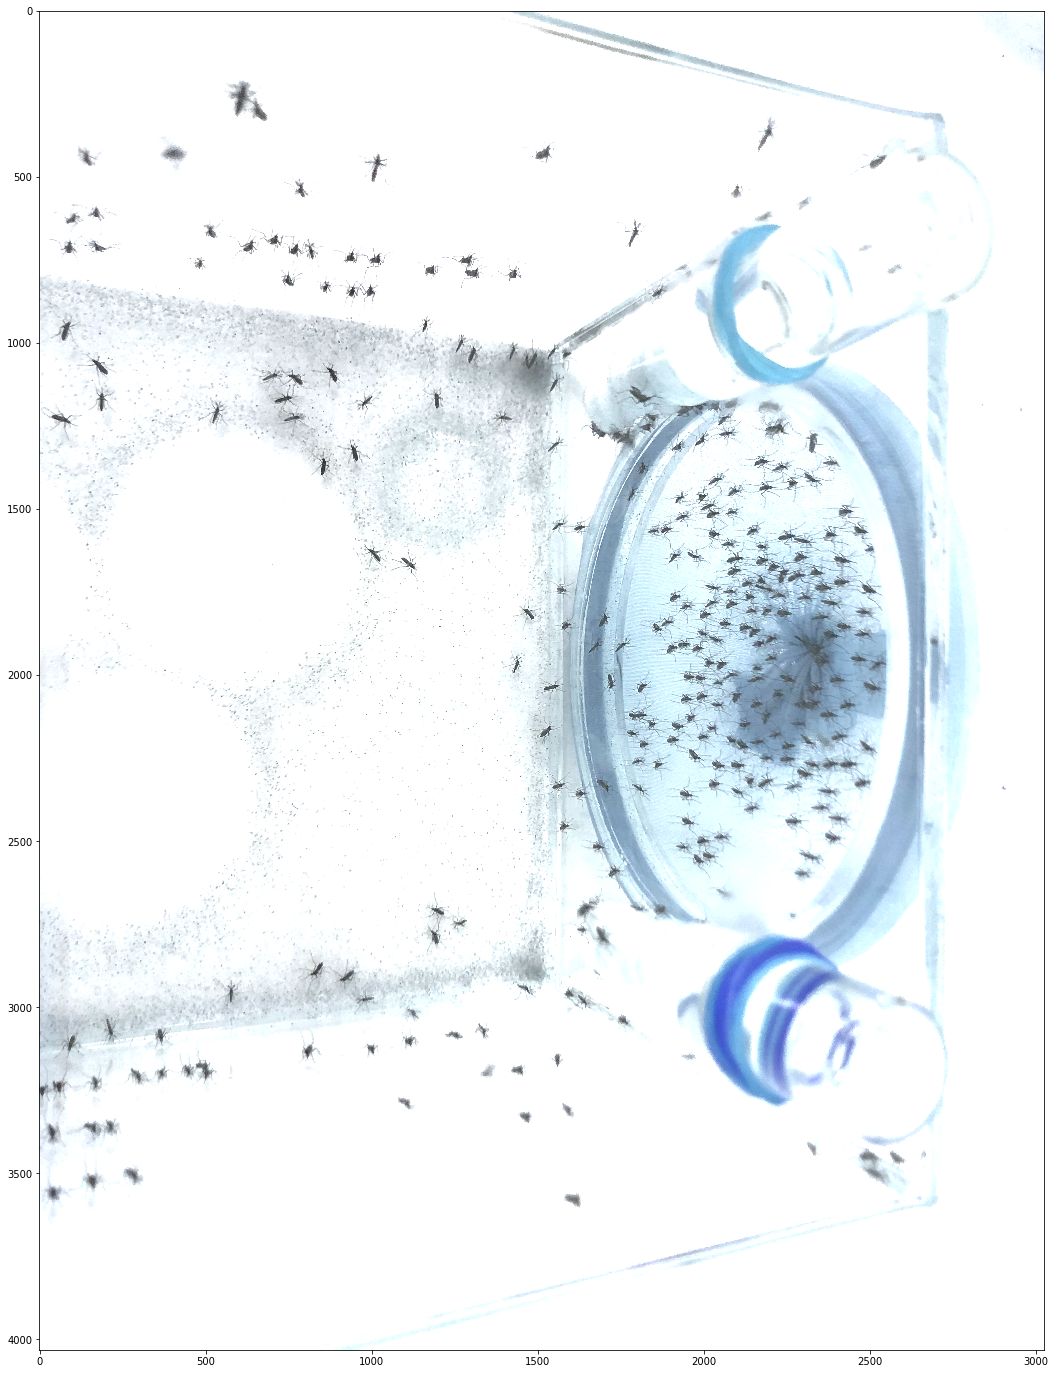

In [12]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

newimg = img.copy()
alpha = 60/np.std(img)
beta = 200-img.mean()
#newimg = np.uint8(np.clip((alpha * newimg + beta), 0, 255))
h, w, ch = newimg.shape
newimg2 = np.zeros([h, w, ch], newimg.dtype)
newimg = cv2.addWeighted(newimg, alpha, newimg2, 1-alpha, beta)

plt.figure(figsize = (18,36))
plt.imshow(newimg, 'gray')
plt.show()

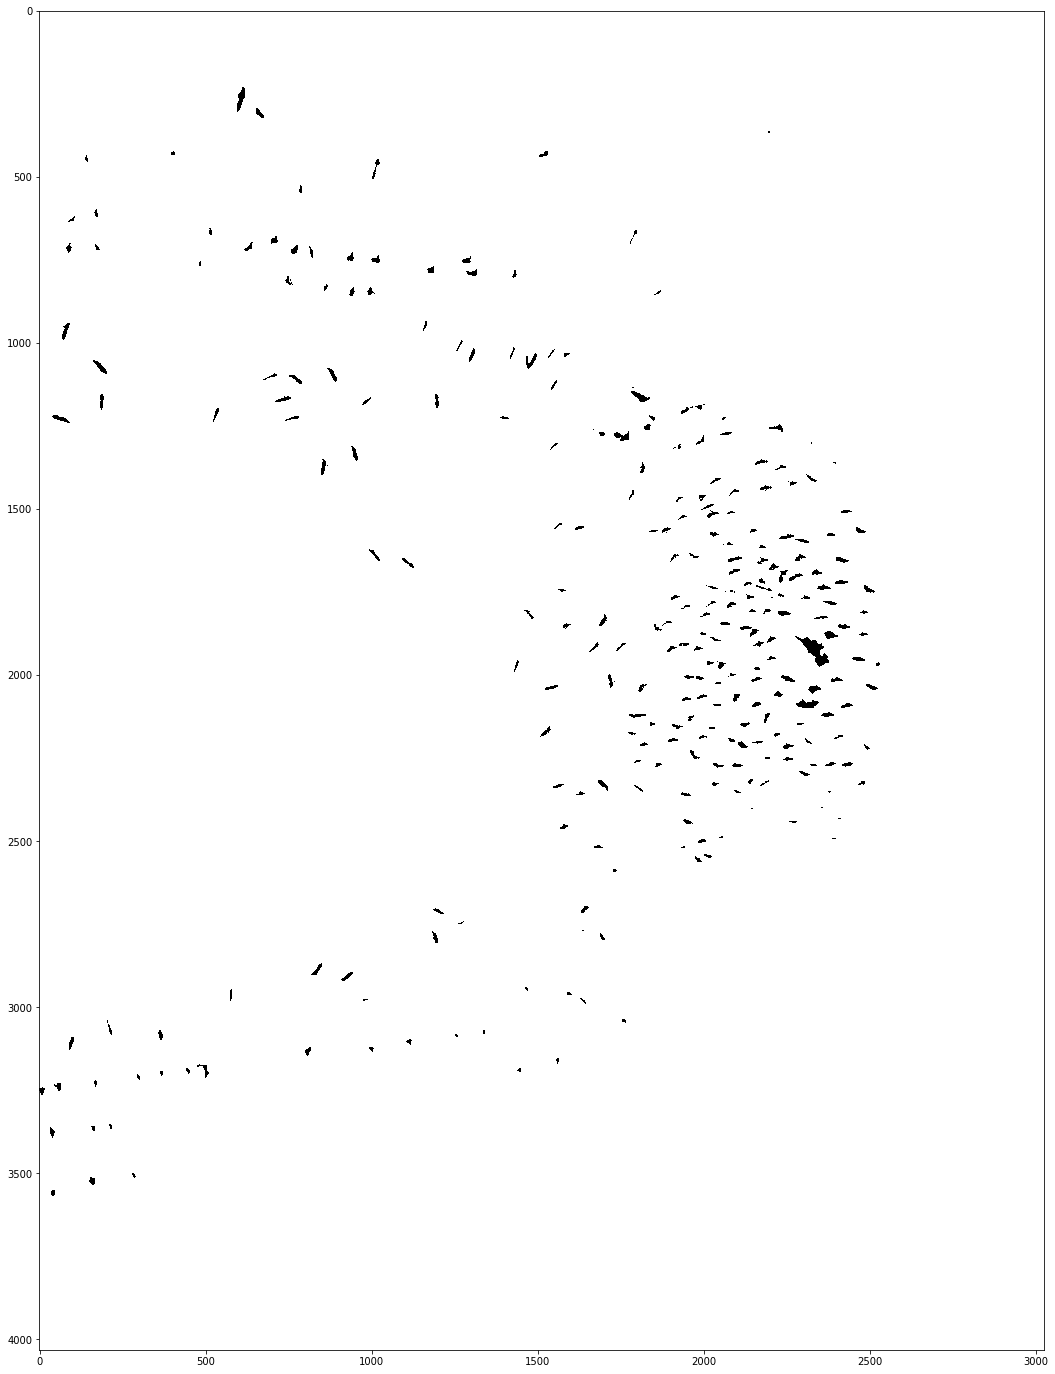

In [13]:
noise = cv2.fastNlMeansDenoisingColored(newimg,None,10,10,7,21)
gray = cv2.cvtColor(noise, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 3)
kernel_size = 3
im = cv2.GaussianBlur(median,(kernel_size, kernel_size), 0)
ret,final = cv2.threshold(im,110,255,cv2.THRESH_BINARY)

plt.figure(figsize = (18,36))
plt.imshow(final, 'gray')
plt.show()

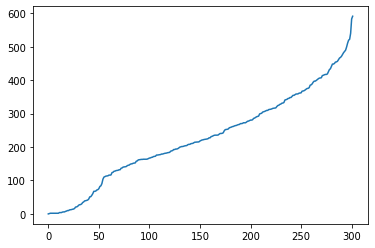

In [14]:
eq_cnts, _ = cv2.findContours(final,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
count = 0
area = []
for c in range(len(eq_cnts)):
    area.append(cv2.contourArea(eq_cnts[c]))

area.sort()
plt.plot(area[:-10])

mosquito number:  283


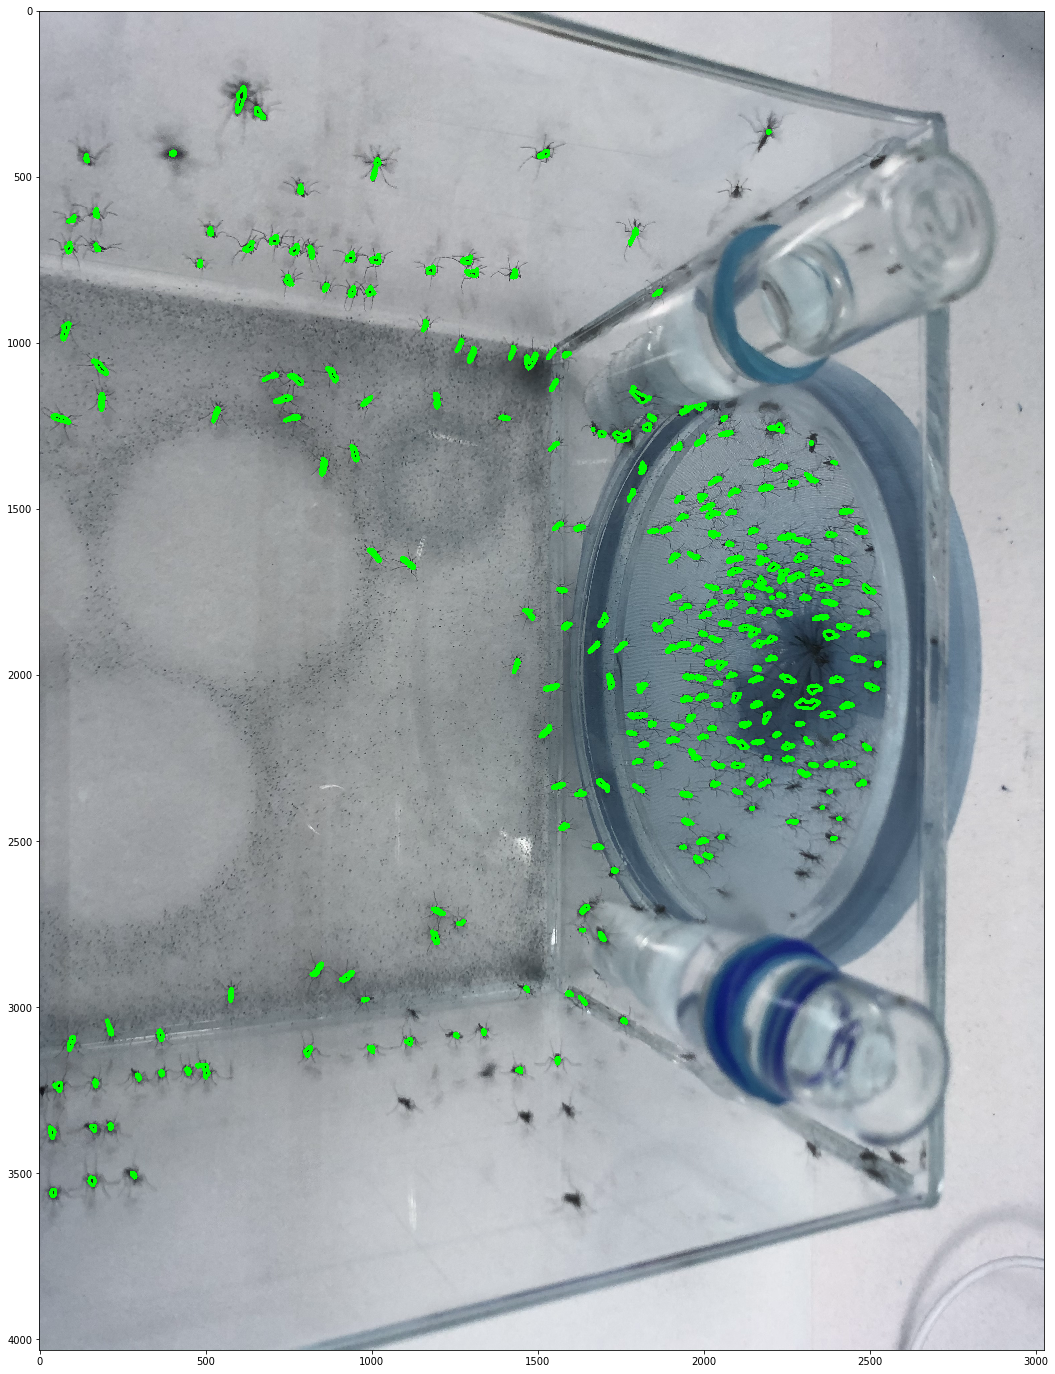

In [15]:
for c in range(len(eq_cnts)):
    if 2000> cv2.contourArea(eq_cnts[c]) > 20:
        cv2.drawContours(img, eq_cnts[c], -1, (0, 255, 0), 10)
        count += 1
plt.figure(figsize = (18,36))
plt.imshow(img, 'gray')
print("mosquito number: ", count)